In [41]:
print('kos enron nips')
base = input()

kos enron nips
kos


In [42]:
# Configure to show multiples outputs from a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
from scipy.sparse import csc_matrix

doc = open('../docword.{}.txt'.format(base))
docs_count = int(doc.readline().replace('\n',''))
dictionary_count = int(doc.readline().replace('\n',''))
word_count = int(doc.readline().replace('\n',''))
trainData = pd.read_csv(doc, delimiter=' ', names=['row', 'col', 'value'])
doc.close()
# csc = csc_matrix((trainData.value.tolist(), (trainData.row.tolist(), trainData.col.tolist())))

print('docs: {}\ndictionary_count: {}\nwords: {}'.format(docs_count, dictionary_count, word_count))

trainData.head()
# Read words of dictionary
vocabulary = pd.read_csv('../vocab.{}.txt'.format(base), names=['vocab', 'count', 'sum'])
# Set the vocabulary index row begin in 1 instead 0
vocabulary.index = vocabulary.index+1


vocabulary.head()

docs: 3430
dictionary_count: 6906
words: 353160


,vocab,count,sum
1,aarp,NaN,NaN
2,abandon,NaN,NaN
3,abandoned,NaN,NaN
4,abandoning,NaN,NaN
5,abb,NaN,NaN


In [43]:
%%time

InteractiveShell.ast_node_interactivity = "last"
pivot = trainData.pivot_table('value', ['row'], 'col').fillna(0)
none_df = pd.DataFrame(0, range(1, pivot.shape[0]+1), range(1, vocabulary.shape[0]+1))
pivot = pivot.combine_first(none_df)
print(pivot.shape, vocabulary.shape)
pivot.columns = vocabulary.vocab.values
X = pivot.values
pivot.head()

(3430, 6906) (6906, 3)
CPU times: user 4.07 s, sys: 104 ms, total: 4.18 s
Wall time: 4.18 s


In [44]:
pivot = pivot.drop(vocabulary[ (vocabulary['sum'] > 100) ].vocab.values, axis=1)
X = pivot.values
pivot

,aarp,abandon,abandoned,abandoning,abb,abc,abcs,abdullah,ability,aboard,...,yucca,yup,zahn,zarqawi,zell,zimbabwe,zogby,zogbys,zone,zones
row,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X)

print('X_train before PCA:\n', X_train)

X_train before PCA:
 [[-0.02382547 -0.08762159 -0.07951749 ..., -0.091445    6.36353143
  -0.05925222]
 [-0.02382547 -0.08762159 -0.07951749 ..., -0.091445   -0.09222509
  -0.05925222]
 [-0.02382547 -0.08762159 -0.07951749 ..., -0.091445   -0.09222509
  -0.05925222]
 ..., 
 [-0.02382547 -0.08762159 -0.07951749 ..., -0.091445   -0.09222509
  -0.05925222]
 [-0.02382547 -0.08762159 -0.07951749 ..., -0.091445   -0.09222509
  -0.05925222]
 [-0.02382547 -0.08762159 -0.07951749 ..., -0.091445   -0.09222509
  -0.05925222]]


In [46]:
# %%time
# from sklearn.decomposition import PCA
# # PCA Dimensionality Reduction

# pca = PCA(n_components=2)
# X_train = pca.fit_transform(X_train)
# explained_variance = pca.explained_variance_ratio_

# explained_variance
# print('X_train after PCA to 2 dimensions:\n', X_train)

In [47]:
# Count = Number of unique documents word was used on 
# Sums = Number of times word was used throughout the documents

x = trainData.groupby(['col'])['value']
counts, sums = x.count(), x.sum()

counts.head()
sums.head()

col
1    12
2    28
3    25
4    17
5    20
Name: value, dtype: int64

In [48]:
vocabulary['count'] = counts
vocabulary['sum'] = sums
vocabulary[ (vocabulary['count'] < 170) & (vocabulary['sum'] < 100)]

,vocab,count,sum
1,aarp,3,12
2,abandon,27,28
3,abandoned,23,25
4,abandoning,17,17
5,abb,11,20
7,abcs,17,18
8,abdullah,9,10
10,aboard,19,19
12,abortions,12,16
13,abraham,15,17


In [49]:
docId = trainData.iloc[:, 0]
vocabularyId = trainData.iloc[:, 1]
words = trainData.iloc[:, 2]

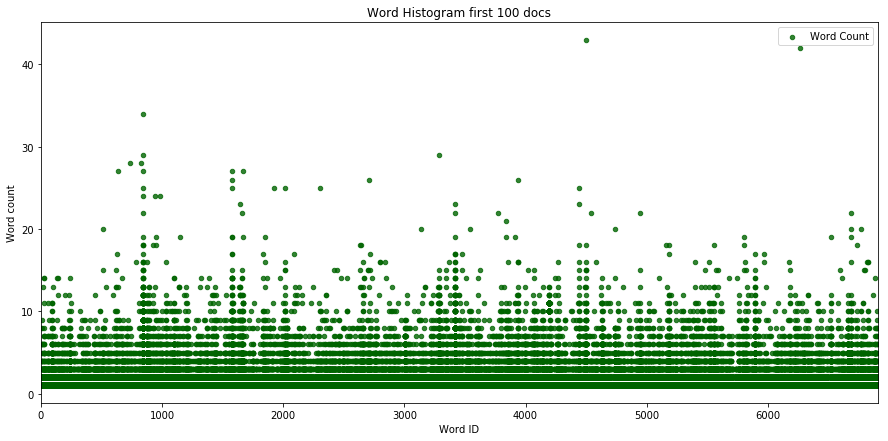

CPU times: user 3.26 s, sys: 588 ms, total: 3.85 s
Wall time: 3.17 s


In [50]:
%%time
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.figure(figsize=[15, 7])
plt.scatter(vocabularyId, words, c='darkgreen', marker='o', s=20, alpha=0.8, label='Word Count')
plt.ylabel('Word count')
plt.xlabel('Word ID')
plt.xlim(0, dictionary_count+1)
plt.legend()
plt.title('Word Histogram first 100 docs')
plt.show()

In [51]:
# pivot = pivot.drop(vocabulary[ (vocabulary['sum'] > 100) ].vocab.values, axis=1)
# X = pivot.values
# pivot

In [52]:
filtered_df = []
max_value = 200
min_value = 50

for index, row in vocabulary.iterrows():
    if((row['count'] > 200 and row['sum'] > 100) or (row['count'] < 50 and row['sum'] > 200)):
        print(row['vocab'])
    else:
        filtered_df.append((row['vocab'], row['count'], row['sum']))

filtered_df = pd.DataFrame(filtered_df, columns=['vocab', 'count', 'sum'])
filtered_df

account
admin
administration
ads
advertising
air
altsite
america
american
americans
apparently
apr
asap
asked
attack
attacks
attention
aug
bad
based
bill
bit
blades
blast
bob
boxblogroll
boxfeed_listing
boxrdf_feeds
bush
bushs
bushsux
calculator
calistan
call
called
campaign
campaigns
candidate
candidates
carolina
challenge
challenger
challengers
challenging
chance
change
check
chemical
cheney
cities
city
clark
clear
close
cnn
coming
committee
congress
congressional
conservative
consistent
contact
continue
convention
country
create
culture
current
deal
dean
debate
decision
defense
dem
democrat
democratic
democrats
dems
dhinmi
district
dkos
dkosopedia
dryfly
early
economy
edwards
effort
efforts
election
elections
electoral
end
endspan
exit
experience
face
fact
faq
feb
federal
final
find
florida
force
found
friday
friends
full
function
gave
general
george
gephardt
gop
gore
government
governor
ground
group
guy
guys
hand
hard
heres
high
homepage
hope
house
hstewart
ill
important
including


,vocab,count,sum
0,aarp,3,12
1,abandon,27,28
2,abandoned,23,25
3,abandoning,17,17
4,abb,11,20
5,abc,75,101
6,abcs,17,18
7,abdullah,9,10
8,ability,106,111
9,aboard,19,19


# K Means
## Como escolher o número de clusters?

### Método Elbow

Escolhemos o número de *clusters* de acordo com o primeiro ponto do gráfico que
possui menor diferença se comparado com seus vizinhos.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

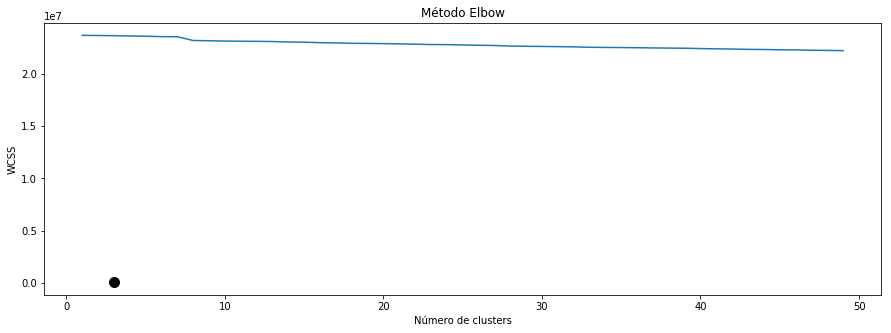

CPU times: user 25.9 s, sys: 9.49 s, total: 35.3 s
Wall time: 2min 33s


In [54]:
%%time
wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=1, random_state=0, n_jobs=-1)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=[15, 5])
plt.plot(range(1,50), wcss)
plt.scatter(3, 79000, c='black', s=100, alpha=1.0)
plt.title('Método Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

## Aplicando o melhor número de clusters:
O número de *clusters* determina diretamente o quão complexo o modelo ficara.
Determinar a quantidade de *clusters* a se utilizar evita que o modelo produzido
caia em:

* **Underfitting**: Pode acontecer quando o modelo é produzido com menos
*clusters* que o necessário, o que torna o modelo altamente generalizado.

* **Overfitting**: Pode acontecer quando o modelo é produzido com mais
*clusters* que o necessário, o que torna o modelo altamente complexo e
específico para a base de treinamento

In [61]:
K = 3
kmeans = KMeans(n_clusters=K, init='k-means++', max_iter=300, n_init=10, random_state=0, n_jobs=-1)
y_kmeans = kmeans.fit(X)

# Validando o modelo

Para avaliar a performance do modelo, deve-se fazer uma análise dos dados e a
relação dos clusters gerados com os pontos disponíveis. Para tal, deve-se fazer
uma análise dos dados dentro de cada cluster (intra cluster) e a relação entre
os diferentes clusters (inter cluster)[1]. Outra métrica possível para realizar
uma medição dos clusters é avaliar o _silhouette coeficient_ [2].

## Intra e Inter

A biblioteca do scikit learn fornece uma métrica chamada
[inertia\_](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMe
ans.html#sklearn.cluster.KMeans) que calcula a soma do quadrado da distância dos
dados para o cluster mais próximo. Isso quer dizer que quanto menor este valor,
mais próximo dos centroids do cluster estão as amostras. Essa métrica é
utilizada para escolher o melhor K no método [elbow](#Método-Elbow).

Os cálculos de inter e intra cluster são descritos em [1].
\begin{equation*}
inertia = \sum_{i=1}^K \sum_{x \in C_i}^n ||x - C_i||^2 \\
inter = \frac{intertia}{N} \\
inter = min(||z_i - z_j||^2) \quad onde \quad \big\{ i = 1 ... ( K - 1 ) \ e\  j
= ( i + 1 ) ... K
\end{equation*}

Nas equações acima, __K__ é o número de clusters, __C_i__ é um centroid cluster
qualquer, __x__ é uma amostra dos dados, __z__ é a representação dos centroids
de
um cluser e __N__ é o total de clusters.

## Silhouette Coefficient

É uma métrica que calcula junto os valores de coesão inter e intra cluster.  O
cálculo para esta métrica é destrito como
\begin{equation*}
    silhouette = \frac{(b - a)}{max(a,b)}
\end{equation*}

em que o valor de __a__ é o valor da média da distância intra-cluster e __b__ é
a média do cluster mais próximo a amostra.

In [56]:
%%time

from scipy.spatial import distance_matrix
inter_distances = None
def inter_cluster(kmeans_model):
    clusters = kmeans_model.cluster_centers_
    inter_distances = distance_matrix(clusters, clusters)
    inter_distances[ inter_distances == 0 ] = np.inf
    return inter_distances.min()

max_intra_cluster = kmeans.inertia_ / K
min_inter_cluster = inter_cluster(kmeans)
print((min_inter_cluster, max_intra_cluster), max_intra_cluster / min_inter_cluster)

(6.7486667821054658, 113732.94707772927) 16852.6541241
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.71 ms


# Resultado

Neste problema de clusterização, não é possível determinar se o modelo fez o
trabalho correto em agrupar os dados ou não. Basea-se então na modelagem
matemática da análise inter cluster e intra cluster para trazer mais confiança.
Como é possível observar no valor da célula anterior da relação intra/inter. Em
que busca-se minimizar o valor de intra e maximizar o valor do inter.

A seguir, mostraremos um gráfico representativo de cada cluster.

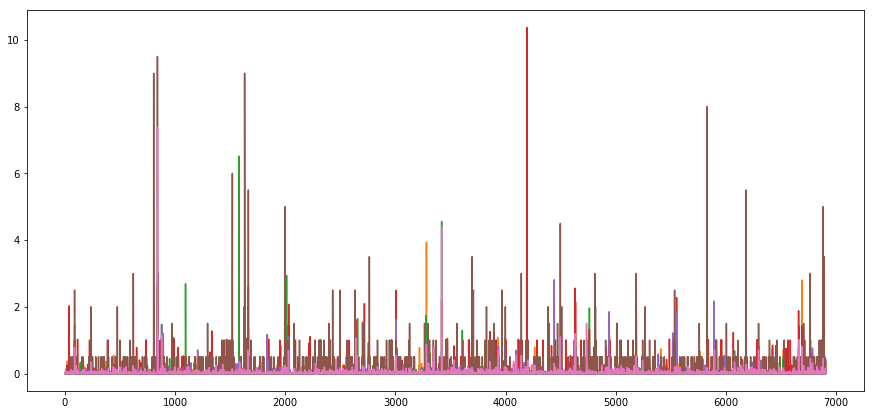

In [57]:
InteractiveShell.ast_node_interactivity = 'last'
plt.figure(figsize=[15, 7])

for cluster in kmeans.cluster_centers_:
    plt.plot(np.arange(1, len(cluster) + 1), cluster)
plt.show()


## Palavras representativas

Com a caracterização dos clusters vistos acima, é perceptível que há algumas
palavras que mais caracterizam um determinado cluster. Então, para tentar
averiguar se a clusterização foi realizada com uma boa acurácia, iremos tentar
identificar se as palavras que aparecem irão ter algum sentido lógico para
representar o cluster.

In [58]:
import collections
clusters_amount = collections.Counter(kmeans.labels_)
clusters = pd.DataFrame(kmeans.cluster_centers_)

# indexes = clusters.iloc[0, :].sort_values(ascending=False).index
# vocabulary.iloc[indexes]

#for cluster in clusters.iterrows():
 #   idxs = cluster[1].sort_values(ascending=False)[:10].index
 #   cluster_size = clusters_amount[cluster[0]]
 #   top10_words = vocabulary.iloc[idxs].vocab.str.cat(sep=', ')
 #   print("cluster {} ({}): {}".format(cluster[0], cluster_size, top10_words))

In [60]:
indexes = clusters.iloc[3, :].sort_values(ascending=False).index
vocab = vocabulary.iloc[indexes]
vocab.count().vocab

#from os import path
from wordcloud import WordCloud

#d = path.dirname("../")

# Read the whole text.
# = open('../Unsupervised-Clustering/test.txt').read()

indexes = clusters.iloc[0, :].sort_values(ascending=False).index
vocabulary.iloc[indexes]
text = ""
for i in range(vocab.count().vocab):
    for j in range(int(vocab.iloc[i]["sum"]/8)):
        text+= (str(vocab.iloc[i]["vocab"])+(str(" ")))


ImportError: No module named 'wordcloud'

In [ ]:
from random import shuffle
l = text.split()

shuffle(l)

text = ' '.join(l)

In [ ]:

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

# lower max_font_size
wordcloud = WordCloud(width = 1000, height = 500, max_font_size=120).generate(text)
plt.figure(figsize=(18, 16), dpi=80)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


#indexes = clusters.iloc[0, :].sort_values(ascending=False).index
#vocabulary.iloc[indexes]

# Referências

[1] [Determination of Number of Clusters in K-Means Clustering and Application
in Colour Image Segmentation](http://citeseerx.ist.psu.edu/viewdoc/download?doi=
10.1.1.587.3517&rep=rep1&type=pdf)

[2] [Silhouette](https://cs.fit.edu/~pkc/classes/ml-internet/silhouette.pdf)